In [1]:
pwd

'/cipslab_shared/home/python_scientist_trainees_4'

In [3]:
import xarray as xr

In [4]:
import pandas as pd

In [5]:
annee = "2024"

In [7]:
# import xarray as xrOuvrir le fichier NetCDF
dataset = xr.open_dataset(f'/archive_cips/archive/climate/ERA5Land/all/raw/{annee}/ERA5Land_{annee}.nc')

In [8]:
# Afficher les informations du dataset
print(dataset)

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 6264, latitude: 81, longitude: 71)
Coordinates:
  * time       (time) datetime64[ns] 50kB 2024-01-01 ... 2024-09-18T23:00:00
  * latitude   (latitude) float64 648B 11.0 10.9 10.8 10.7 ... 3.3 3.2 3.1 3.0
  * longitude  (longitude) float64 568B -9.0 -8.9 -8.8 -8.7 ... -2.2 -2.1 -2.0
Data variables:
    t2m        (time, latitude, longitude) float32 144MB ...
    d2m        (time, latitude, longitude) float32 144MB ...
    u10        (time, latitude, longitude) float32 144MB ...
    v10        (time, latitude, longitude) float32 144MB ...
    sp         (time, latitude, longitude) float32 144MB ...
    tp         (time, latitude, longitude) float32 144MB ...
    ssrd       (time, latitude, longitude) float32 144MB ...
    swvl1      (time, latitude, longitude) float32 144MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Con

In [9]:
temperature = dataset ['t2m']

In [10]:
tmax = dataset['t2m'].resample(time='D').max()

In [16]:
tmax_celsuis = tmax - 273.15

In [17]:
tmax_celsuis

<xarray.DataArray 't2m' (time: 262, latitude: 81, longitude: 71)> Size: 6MB
array([[[35.217194, 35.24063 , 35.318756, ..., 35.004303, 34.96524 ,
         34.937897],
        [34.930084, 34.994537, 35.074615, ..., 35.131256, 35.006256,
         34.958893],
        [34.67032 , 34.853912, 34.935944, ..., 35.242584, 35.006256,
         34.835846],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[35.37686 , 35.396393, 35.46866 , ..., 35.34561 , 35.308502,
         35.316315],
        [35.083893, 35.142487, 35.22061 , ..., 35.466705, 35.378815,
         35.372955],
        [34.80069 , 34.98819 , 35.06436 , ..., 35.59366 , 35.402252,
         35.259674],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[29.541534, 29.527985, 29.527985, ..., 29.7919  , 29.799713,
         29.893463],
        [29.547394, 29.504425, 29.492706, ..., 29.764557, 29.80362 ,
         29.907135],
        [29.596344, 29.561066, 29.58841 , ..., 29.77237 , 29.774323,
         29.795807],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 648B 11.0 10.9 10.8 10.7 ... 3.3 3.2 3.1 3.0
  * longitude  (longitude) float64 568B -9.0 -8.9 -8.8 -8.7 ... -2.2 -2.1 -2.0
  * time       (time) datetime64[ns] 2kB 2024-01-01 2024-01-02 ... 2024-09-18

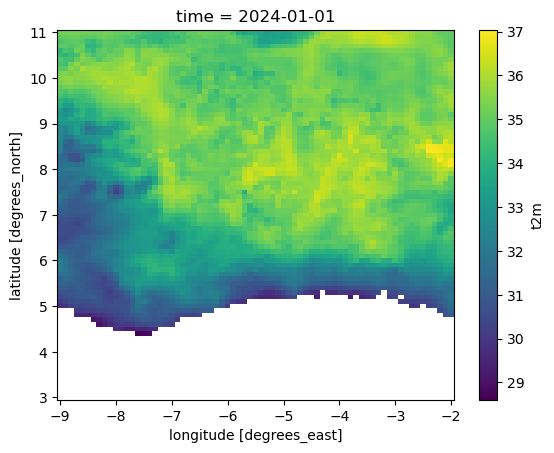

In [14]:
tmax_celsuis.isel(time=0).plot()

In [18]:
tmax_celsuis.to_netcdf('tmax_daily.nc')